## dimention reduction
### data processing
- transform data from excel column to suitable format for visualization
- implementation of dimension reduction without package

In [1]:
import string

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

### load excel data and take the lines we are interested in

In [2]:
df = pd.read_excel("./paper.xlsx")

In [3]:
new_df = pd.DataFrame({"title": df["Title"], "author_name": df["AuthorNames-Deduped"], "abstract": df["Abstract"],
                       "paper_type": df["PaperType"], "cite_number": df['PubsCited'], "award": df['Award']})
new_df.head()

,title,author_name,abstract,paper_type,cite_number,award
0,D³ Data-Driven Documents,Michael Bostock;Vadim Ogievetsky;Jeffrey Heer,Data-Driven Documents (D3) is a novel represen...,J,41.0,NaN
1,Tree-maps: a space-filling approach to the vis...,Brian Johnson;Ben Shneiderman,A method for visualizing hierarchically struct...,C,23.0,NaN
2,Parallel coordinates: a tool for visualizing m...,Alfred Inselberg;Bernard Dimsdale,A methodology for visualizing analytic and syn...,C,47.0,NaN
3,Hierarchical Edge Bundles: Visualization of Ad...,Danny Holten,A compound graph is a frequently encountered t...,J,33.0,TT;BP
4,ROAMing terrain: Real-time Optimally Adapting ...,Mark A Duchaineau;Murray Wolinsky;David E Sige...,Terrain visualization is a difficult problem f...,C,19.0,NaN


### create category

In [4]:
for i in range(len(df['PaperType'])):
    if df['PaperType'][i] == "J":
        new_df.at[i, 'paper_type'] = 0
    elif df['PaperType'][i] == "C":
        new_df.at[i, 'paper_type'] = 1
    elif df['PaperType'][i] == "M":
        new_df.at[i, 'paper_type'] = 2

for j in range(len(df['PubsCited'])):
    if df['PubsCited'][j] < 30:
        new_df.at[j, 'cite_number'] = 0
    elif df['PubsCited'][j] > 50:
        new_df.at[j, 'cite_number'] = 2
    else:
        new_df.at[j, 'cite_number'] = 1

for k in range(len(df['Award'])):
    if isinstance(df['Award'][k], str) is True:
        new_df.at[k, 'award'] = 1
    else:
        new_df.at[k, 'award'] = 0

new_df.head()

,title,author_name,abstract,paper_type,cite_number,award
0,D³ Data-Driven Documents,Michael Bostock;Vadim Ogievetsky;Jeffrey Heer,Data-Driven Documents (D3) is a novel represen...,0,1.0,0
1,Tree-maps: a space-filling approach to the vis...,Brian Johnson;Ben Shneiderman,A method for visualizing hierarchically struct...,1,0.0,0
2,Parallel coordinates: a tool for visualizing m...,Alfred Inselberg;Bernard Dimsdale,A methodology for visualizing analytic and syn...,1,1.0,0
3,Hierarchical Edge Bundles: Visualization of Ad...,Danny Holten,A compound graph is a frequently encountered t...,0,1.0,1
4,ROAMing terrain: Real-time Optimally Adapting ...,Mark A Duchaineau;Murray Wolinsky;David E Sige...,Terrain visualization is a difficult problem f...,1,0.0,0


### remove stopwords and other unwanted characters

In [5]:
lemmatizer = WordNetLemmatizer()
stop_words = stopwords.words('english')
stop_words = stop_words + list(string.printable)
new_df['cleaned_data'] = new_df["abstract"].apply(lambda x: ' '.join(
    [lemmatizer.lemmatize(word.lower()) for word in word_tokenize(re.sub(r'([^\s\w]|_)+', ' ', str(x)))
     if word.lower() not in stop_words]))
new_df.head()

,title,author_name,abstract,paper_type,cite_number,award,cleaned_data
0,D³ Data-Driven Documents,Michael Bostock;Vadim Ogievetsky;Jeffrey Heer,Data-Driven Documents (D3) is a novel represen...,0,1.0,0,data driven document d3 novel representation t...
1,Tree-maps: a space-filling approach to the vis...,Brian Johnson;Ben Shneiderman,A method for visualizing hierarchically struct...,1,0.0,0,method visualizing hierarchically structured i...
2,Parallel coordinates: a tool for visualizing m...,Alfred Inselberg;Bernard Dimsdale,A methodology for visualizing analytic and syn...,1,1.0,0,methodology visualizing analytic synthetic geo...
3,Hierarchical Edge Bundles: Visualization of Ad...,Danny Holten,A compound graph is a frequently encountered t...,0,1.0,1,compound graph frequently encountered type dat...
4,ROAMing terrain: Real-time Optimally Adapting ...,Mark A Duchaineau;Murray Wolinsky;David E Sige...,Terrain visualization is a difficult problem f...,1,0.0,0,terrain visualization difficult problem applic...


### create tfidf matrix for column 'abstract'
Because units in abstract are construted by a sentence or a phrase, tf-idf model is more suitable for it

In [6]:
tfidf_model = TfidfVectorizer(max_features=30)  # max_features select the top ones ordered by term frequency across the corpus
tfidf_df = pd.DataFrame(tfidf_model.fit_transform(new_df['cleaned_data']).todense())
tfidf_df.columns = sorted(tfidf_model.vocabulary_)
tfidf_df

,algorithm,analysis,approach,based,data,design,different,field,information,interactive,...,system,technique,time,tool,used,user,using,visual,visualization,volume
0,0.000000,0.000000,0.658272,0.000000,0.457507,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.391185,0.000000,0.000000,0.000000,0.000000,0.228314,0.0
1,0.000000,0.000000,0.215515,0.000000,0.000000,0.000000,0.000000,0.0,0.703259,0.000000,...,0.000000,0.195430,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.149498,0.0
2,0.500250,0.000000,0.000000,0.376478,0.000000,0.000000,0.000000,0.0,0.457332,0.000000,...,0.431873,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,0.000000,0.000000,0.172017,0.308053,0.119554,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.311973,0.000000,0.000000,0.183907,0.163938,0.000000,0.161200,0.477297,0.0
4,0.352552,0.000000,0.000000,0.265324,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.637709,0.000000,0.000000,0.000000,0.296062,0.000000,0.205546,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3389,0.176717,0.595632,0.297055,0.265987,0.103228,0.177765,0.345172,0.0,0.000000,0.000000,...,0.152562,0.269371,0.000000,0.000000,0.317586,0.141551,0.000000,0.139187,0.000000,0.0
3390,0.181919,0.459873,0.000000,0.000000,0.212534,0.000000,0.177666,0.0,0.166311,0.168865,...,0.471159,0.138650,0.000000,0.000000,0.000000,0.291435,0.000000,0.143284,0.212125,0.0
3391,0.000000,0.429918,0.000000,0.127990,0.596069,0.000000,0.332186,0.0,0.000000,0.157865,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.133951,0.000000,0.0
3392,0.212870,0.000000,0.178914,0.160202,0.497389,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.192524,0.000000,0.000000,0.000000,0.000000,0.167663,0.000000,0.0


### implementation of PCA and t-SNE algorithms using methods from sklearn package

In [7]:
from sklearn.decomposition import PCA
pca = PCA(2)
pca.fit(tfidf_df)
reduced_tfidf = pca.transform(tfidf_df)
reduced_tfidf

array([[-0.10624659,  0.15123979],
       [ 0.10622759, -0.09934144],
       [ 0.1257679 , -0.12520443],
       ...,
       [-0.29130661,  0.33401493],
       [ 0.06554367,  0.32921888],
       [-0.29955609, -0.26007642]])

In [8]:
reduced_tfidf.shape

(3394, 2)

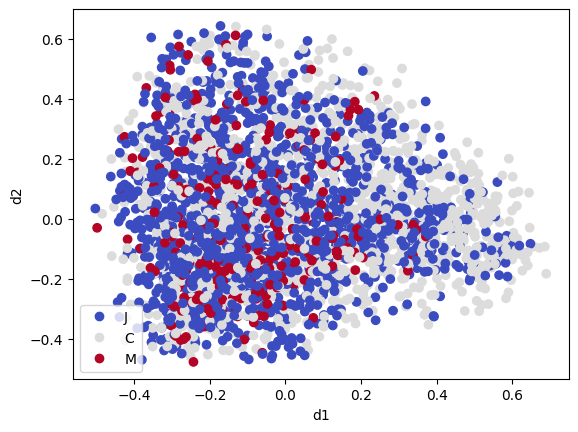

In [9]:
scatter = plt.scatter(reduced_tfidf[:, 0], reduced_tfidf[:, 1], c=new_df['paper_type'], cmap='coolwarm')
plt.xlabel('d1')
plt.ylabel('d2')
plt.legend(handles=scatter.legend_elements()[0], labels=["J", "C", "M"], loc='lower left')
plt.show()

In [10]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=30, random_state=2000)  # set random_state to ensure every outcome is the same
reduced_tfidf_tsne = tsne.fit_transform(tfidf_df)
reduced_tfidf_tsne

array([[-30.857492 ,  16.105974 ],
       [-30.490305 , -44.23514  ],
       [ 21.769278 ,   7.747972 ],
       ...,
       [ -4.10664  ,  -7.9146204],
       [-26.417477 ,  12.347655 ],
       [-12.377018 , -31.636436 ]], dtype=float32)

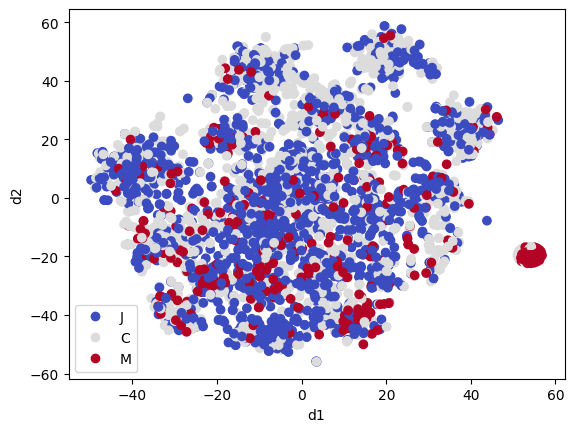

In [11]:
scatter = plt.scatter(reduced_tfidf_tsne[:, 0], reduced_tfidf_tsne[:, 1], c=new_df['paper_type'], cmap='coolwarm')
plt.xlabel('d1')
plt.ylabel('d2')
plt.legend(handles=scatter.legend_elements()[0], labels=["J", "C", "M"], loc='lower left')
plt.show()

### create word-bag model (tf-vector) for column 'AuthorName-Deduped'
Because author names are unique, a word-bag model is more suitable. Here tf vector is used.

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
tf_model = CountVectorizer(max_features=1000, token_pattern=r'(?u)[a-zA-Z][a-zäöüéàáèâêçñîôûúùśźýëï ]+')
tf_df = pd.DataFrame(tf_model.fit_transform(new_df['author_name']).todense())
tf_df.columns = sorted(tf_model.vocabulary_)
tf_df

,aaron knoll,abish malik,adam perer,aditi majumder,agatay demiralp,aidan slingsby,aidong lu,al globus,alan d kalvin,alan h barr,...,zhen li,zhen wen,zhicheng liu,zhiguang zhou,zhutian chen,zichun zhong,zikun deng,ziyi zheng,zoltan konyha,zuchao wang
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3389,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3390,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3391,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3392,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
pca.fit(tf_df)
reduced_tf = pca.fit_transform(tf_df)
reduced_tf

array([[-0.01577538, -0.01507501],
       [-0.01270451, -0.01142142],
       [-0.01057287, -0.00898425],
       ...,
       [ 0.01656281, -0.00540507],
       [-0.06916722, -0.06135058],
       [-0.01751552, -0.00381222]])

In [16]:
reduced_tf_tsne = tsne.fit_transform(tf_df)
reduced_tf_tsne

array([[  61.89612 ,   73.5791  ],
       [ -46.67972 ,  -17.128357],
       [ -15.556905,  -96.07853 ],
       ...,
       [  -3.678795,  -11.08844 ],
       [ -51.90154 ,   19.47319 ],
       [-101.28766 ,  -26.712128]], dtype=float32)

### finally, use the following code to generate data file for visualization
You can change outpath at will.

In [ ]:
# outpath = ""
# out_df = pd.DataFrame(reduced_tfidf)
# out_df['title'] = new_df["title"]
# out_df['paper_type'] = new_df["paper_type"]
# out_df['cite_number'] = new_df["cite_number"]
# out_df['award'] = new_df["award"]
# out_df.to_csv(outpath)

### Implementation of PCA from scratch
PCA consists of 5 steps: standardization, covariance matrix, eigenvectors/eigenvalues, sorting eigenvalues and eigenvectors and transformation of principal vectors. These steps are programmed as follows:

In [15]:
def my_pca_function(input_matrix, num_features):
    # standardize the range of variables
    input_mean = input_matrix - np.mean(input_matrix, axis=0)
    # compute the covariance matrix to identify correlations
    cov_matrix = np.cov(input_mean, rowvar=False)
    # compute the eigenvectors and eigenvalues of the covariance matrix to identify the principal components
    eigen_values, eigen_vectors = np.linalg.eigh(cov_matrix)
    # create a feature vector by sorting the eigenvalues and select designated number of eigenvectors
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvectors = eigen_vectors[:, sorted_index]
    eigenvector_subset = sorted_eigenvectors[:, 0:num_features]
    # recast the data along the Principal Components axes
    reduced = np.dot(eigenvector_subset.transpose(), input_mean.transpose()).transpose()

    return reduced

my_reduced_pca = my_pca_function(tfidf_df, 2)
my_reduced_pca

array([[ 0.10613468,  0.15167274],
       [-0.10588027, -0.10048368],
       [-0.12557151, -0.12536693],
       ...,
       [ 0.29114273,  0.33473303],
       [-0.06547853,  0.32887122],
       [ 0.29967984, -0.26034966]])

### Implementation of t-SNE from scratch
Because of the running time of t-SNE algorithm is so long (about 13 mins on a 12-core AMD Ryzen 5 CPU computer), I did not include the functions in this notebook. I have attached the script of t-SNE functions under the path .\python\task4_b_TSNE.py and the theoretical description of t-SNE is written in the pdf file.